## Validate MOAST methodology in all forms and all steps for TargetMol

In [1]:
#!/usr/bin/env python
import pandas as pd, numpy as np
from MOAST import Build, GenSimMats
import pyarrow as pa
import os, sys


So we will be 'testing' or 'validating' by building and running the method with TargetMol noPMA and PMA+noPMA datasets.

specifically we will be using the UMAP_noPMA_longtrain_full and UMAP_PMA+noPMA_horiztrain_full datasets, which both should have a similar shape of (~20730, 100)


we'll be prioritizing the output of the following classes:

- STAT
- VKOR
- PAR
- Glucokinase
- Ras
- HMG-CoA_Reductase
- DUB
- TNF
- COX
- AURK
- Glucocorticoid_Receptor


In [10]:
annots = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/KStest_py_20240125_FeatReductions/reducedKey_cytoscapeAnnot.xlsx")

noPMA_ref = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1uM+10uM_noPMA_HD_longconcat_UMAPreduced.csv")

PMA_noPMA_ref = os.path.abspath("D:/Akshar/ScottLokeyLab/TargetMol-CP3/TargetMol-CP3/FrozenVersions/TargetMol_1-27_1uM+10uM_PMA+noPMA_HD_horizconcat-dropna_UMAPreduced.csv")

plateSimMat_reportDir = os.path.abspath("B:/TM_FeatReports_MOAST")
target_MOAST_output_dir = os.path.abspath("B:/MOAST_validationTest")

In [11]:
# Read in the relevant files
annotsDF = pd.read_excel(annots, sheet_name="reducedKey")
noPMA_refDF = pd.read_csv(noPMA_ref,engine="pyarrow",index_col=0)
display(annotsDF.columns, noPMA_refDF.shape)


Index(['IDname', 'TM_ID', 'Concentration', 'Well', 'Plate', 'IDname_short',
       'Refined_Acronym', 'AL_CONSOLIDATED', 'Name', 'TM_Target',
       'TM_Pathways', 'GPT4-FunctionalClass', 'GPT4-KEGG', 'GPT4-Target'],
      dtype='object')

(20734, 100)

In [12]:
# build the class KDEdict
b = Build(dataset=noPMA_refDF,
        # nullData=testNullData,
        classesDf=annotsDF,
        on="IDname",
        classesCol="AL_CONSOLIDATED",
    )
refDict = b.build()

c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")
c:\ProgramData\Miniconda3\envs\MOAST\Lib\site-packages\KDEpy\bw_selection.py:263: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman

In [14]:
display(list(refDict.items())[:5])

[('1,3-beta-D-glucan_synthase',
  (array([-0.02360533, -0.02353446, -0.02346359, ...,  1.44552368,
           1.44559455,  1.44566542]),
   array([ 2.22044605e-16,  2.22044605e-16,  4.01456646e-17, ...,
           7.04621546e-17, -9.90614997e-16,  3.53416062e-16]))),
 ('3C-like_protease_(3CLpro)_of_coronaviruses',
  (array([-0.0707899 , -0.07071478, -0.07063967, ...,  1.48643764,
           1.48651275,  1.48658787]),
   array([-2.76322175e-19,  4.64576525e-16,  5.45420499e-16, ...,
          -1.21293592e-15, -2.83230229e-16, -8.89560031e-16]))),
 ('4-hydroxyphenylpyruvate_dioxygenase',
  (array([-0.07204936, -0.07197291, -0.07189645, ...,  1.5128836 ,
           1.51296006,  1.51303651]),
   array([-2.74738318e-17, -2.74738318e-17,  3.05217417e-16, ...,
           5.33942651e-16, -2.74738318e-17,  7.64921835e-17]))),
 ('5-ASA',
  (array([-0.07300913, -0.0729365 , -0.07286387, ...,  1.43271414,
           1.43278677,  1.4328594 ]),
   array([1.15326824e-09, 8.83649995e-09, 1.18821572e-0

In [26]:
b.to_pickle(os.path.join(target_MOAST_output_dir,"noPMA_refDist.csv.pkl.gz"))

In [27]:
display(b.refDist)

,T6207._.1uM._.F15._.SP7209,T4564._.1uM._.E08._.SP7209,T5009._.1uM._.B19._.SP7209,T4687._.1uM._.C12._.SP7209,T5039._.1uM._.G01._.SP7209,T6380._.1uM._.G02._.SP7209,T4695._.1uM._.C24._.SP7209,DMSO._.NA._.F19._.SP7209,T5139._.1uM._.J23._.SP7209,DMSO._.NA._.J11._.SP7209,...,T7001._.10uM._.N09._.SP7237,T7087._.10uM._.B23._.SP7237,T5266._.10uM._.J18._.SP7237,T5126._.10uM._.B08._.SP7237,well_R._.10uM._.F09._.SP7237,well_R._.10uM._.E20._.SP7237,well_R._.10uM._.M13._.SP7237,Alrestatin_3._.10uM._.M20._.SP7237,LY2109761_2._.10uM._.I06._.SP7237,TCS7004_3._.10uM._.K21._.SP7237
AL_CONSOLIDATED,,,,,,,,,,,,,,,,,,,,,
"1,3-beta-D-glucan_synthase",0.107509,0.123137,0.096827,0.100349,0.092582,0.162702,0.102629,0.060175,0.087231,0.056930,...,0.052595,0.197019,0.111022,0.091055,0.088060,0.125004,0.099079,0.126670,0.143585,0.123842
3C-like_protease_(3CLpro)_of_coronaviruses,0.055630,0.085894,0.044887,0.055004,0.049273,0.108127,0.060750,0.014180,0.054593,0.010928,...,0.032998,0.209634,0.073514,0.072749,0.053574,0.087195,0.064463,0.088540,0.163173,0.085417
4-hydroxyphenylpyruvate_dioxygenase,0.088363,0.088317,0.076624,0.064466,0.078367,0.129491,0.085862,0.014389,0.057991,0.010187,...,0.030081,0.171828,0.043497,0.044100,0.022972,0.054023,0.034500,0.055271,0.145025,0.102783
5-ASA,0.102241,0.126358,0.057011,0.069149,0.071925,0.181248,0.088259,0.030068,0.069169,0.024341,...,0.088165,0.290516,0.153589,0.129236,0.120561,0.172054,0.152062,0.173921,0.182050,0.169669
5-HT,0.091626,0.089809,0.097525,0.090065,0.104351,0.130012,0.104144,0.084182,0.084422,0.099106,...,0.071308,0.196221,0.102783,0.125867,0.114843,0.106325,0.103981,0.106421,0.157268,0.111333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thyroperoxidase,0.082344,0.070319,0.090756,0.078440,0.122215,0.106728,0.119081,0.080936,0.070670,0.101936,...,0.072742,0.231390,0.091763,0.151986,0.115211,0.090732,0.099657,0.090562,0.133423,0.098636
transglutaminase,0.070825,0.089140,0.044365,0.048235,0.048356,0.137378,0.060697,0.008822,0.046866,0.006956,...,0.045623,0.222649,0.095979,0.080594,0.070769,0.111036,0.090626,0.112488,0.161410,0.119162
urease,0.086539,0.107200,0.094179,0.105646,0.156174,0.062872,0.156372,0.081077,0.108020,0.069235,...,0.057246,0.194632,0.001965,0.088356,0.025500,0.002918,0.009691,0.003367,0.079197,0.049851


 for sanity check, we'll plot the reference KDEs for each class

In [23]:
import matplotlib.pyplot as plt, seaborn as sns, scipy as sp, statsmodels as sm
def sanitizeNames(name):
    return name.replace("/","_").replace("(","").replace(")","").replace(',','_')

for consolClass,(kde_support,kde_pdf) in refDict.items():
    plt.plot(kde_support,kde_pdf)
    plt.title(consolClass)
    # plt.show()
    plt.savefig(os.path.join(target_MOAST_output_dir,sanitizeNames(consolClass)+".png"))
    plt.close()

Lets look at the specific classes we want to highlight

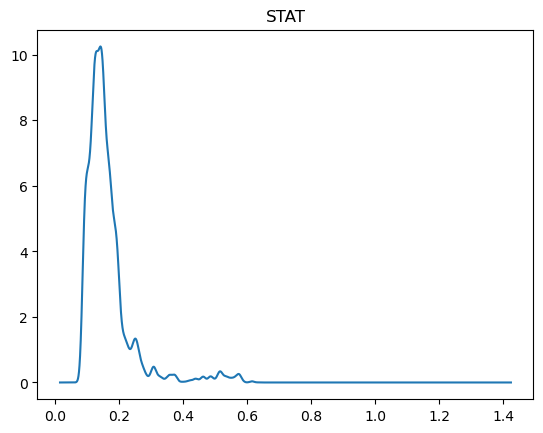

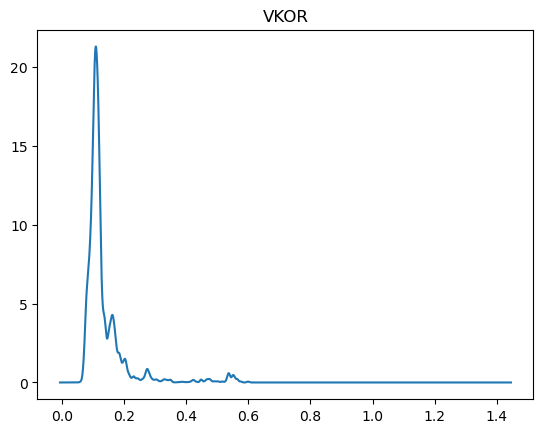

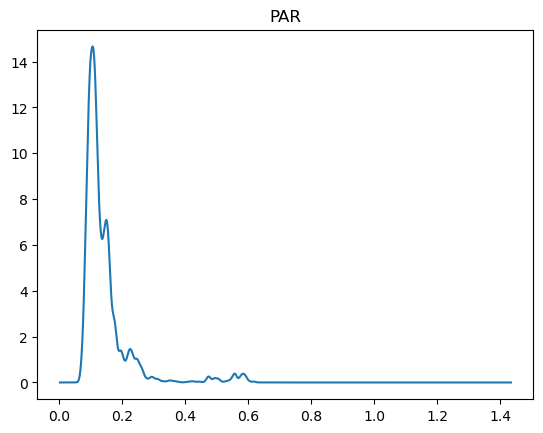

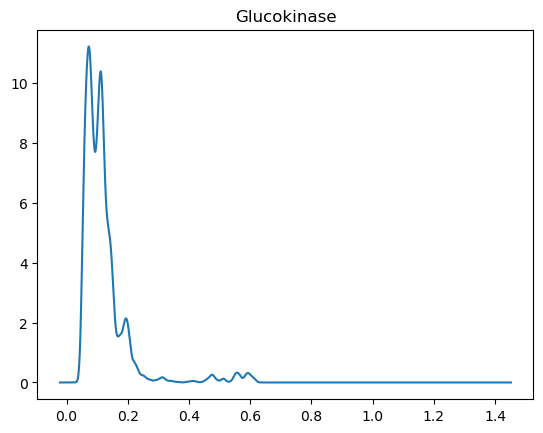

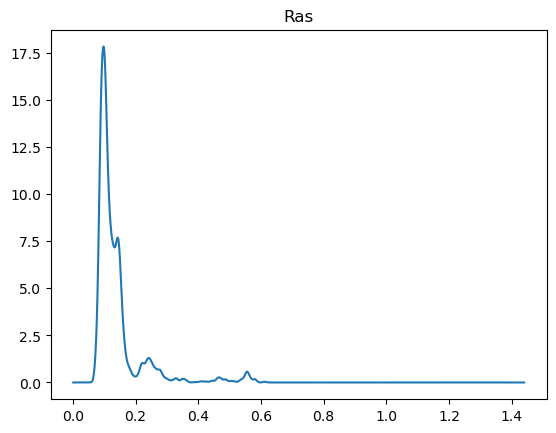

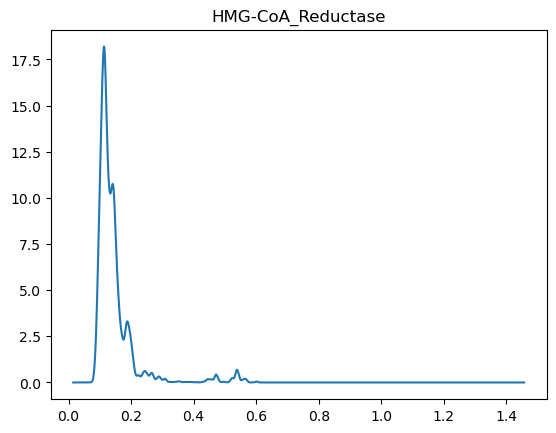

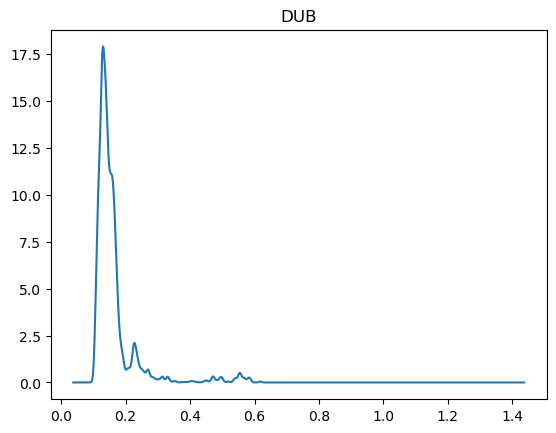

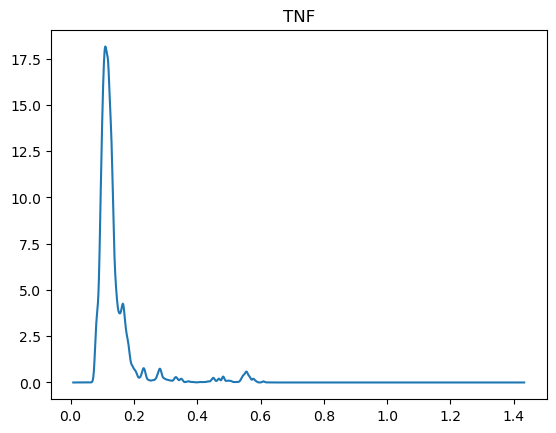

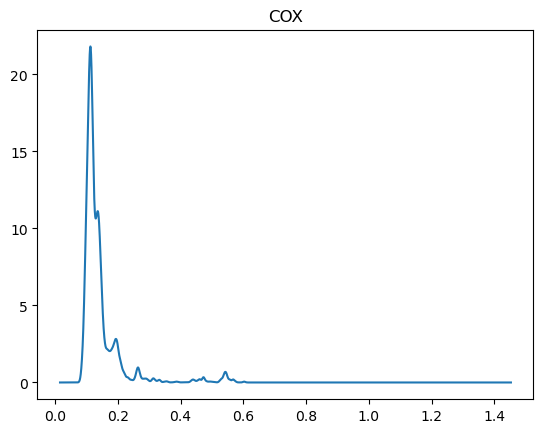

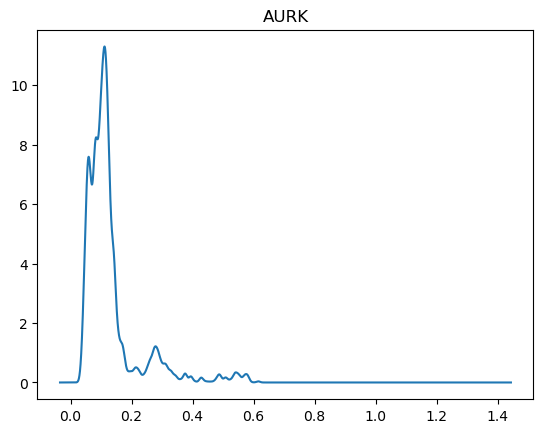

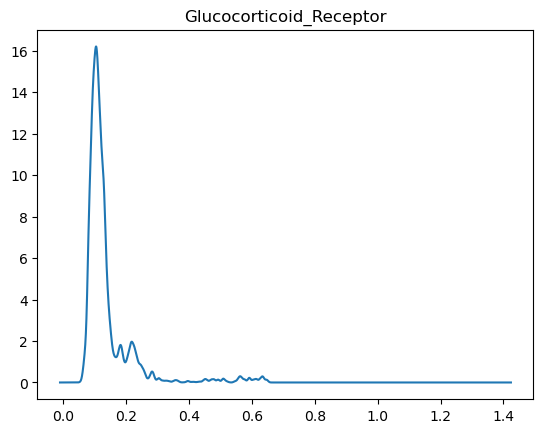

In [25]:
for consolClass in "- STAT- VKOR- PAR- Glucokinase- Ras- HMG-CoA_Reductase- DUB- TNF- COX- AURK- Glucocorticoid_Receptor".split('- '):
    if consolClass != '':
        kde_support, kde_pdf = refDict[consolClass]
        plt.plot(kde_support, kde_pdf)
        plt.title(consolClass)
        plt.show()
        # plt.savefig(
        #     os.path.join(target_MOAST_output_dir, sanitizeNames(consolClass) + ".png")
        # )
        plt.close()

Okay let's verify that these plots (and the build operations) are correct.

In [29]:
nullSet = noPMA_refDF.sample(n=15000,replace=True).reset_index().drop(columns="Index")
display(nullSet)

,UMAP_0,UMAP_1,UMAP_2,UMAP_3,UMAP_4,UMAP_5,UMAP_6,UMAP_7,UMAP_8,UMAP_9,...,UMAP_90,UMAP_91,UMAP_92,UMAP_93,UMAP_94,UMAP_95,UMAP_96,UMAP_97,UMAP_98,UMAP_99
0,9.980448,2.929350,4.884476,4.842905,4.839527,5.006330,4.893762,4.876195,5.054722,4.926375,...,5.057658,4.245768,4.982673,4.818685,4.769828,5.041203,4.600133,5.072833,5.013074,5.069713
1,9.990618,2.975514,4.939446,4.948147,4.820624,4.940855,4.914851,4.816542,5.012428,4.957227,...,5.117265,5.317269,5.120968,4.365524,4.717822,5.242894,4.394874,5.456321,5.210242,5.102157
2,9.981623,2.942350,4.895820,4.841275,4.838153,5.008158,4.895007,4.903621,5.044286,4.941782,...,5.029619,4.449583,5.053678,4.692803,4.750280,5.069990,4.652022,4.997578,5.013416,5.118647
3,9.988197,2.908432,4.859609,4.785722,4.866656,5.007928,4.884877,5.006767,5.083025,4.942080,...,5.060197,4.923407,5.020925,4.252054,4.851983,5.125547,4.612607,5.078440,4.945838,5.140690
4,9.986473,2.942484,4.944453,4.862374,4.821099,4.994173,4.899188,4.903500,5.054955,5.045010,...,5.031004,4.444107,4.976994,4.676938,4.774586,5.084531,4.643808,5.024857,4.983430,5.195797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,9.977150,2.899604,4.780243,4.756742,4.896251,5.027621,4.875973,4.995550,5.073510,4.771207,...,5.069606,4.840262,5.139926,4.265408,4.830558,5.098094,4.607554,5.067841,4.959189,5.015036
14996,9.982226,2.896701,4.770793,4.732291,4.895624,5.040547,4.874192,5.021948,5.075955,4.780735,...,5.054092,4.800283,5.109131,4.292592,4.844070,5.069105,4.678737,4.955388,4.936245,5.055510
14997,9.966137,2.926229,4.819598,4.832604,4.865986,5.011739,4.890091,4.885222,5.054905,4.790424,...,5.070333,4.702806,4.995212,4.573197,4.801977,5.064273,4.627423,5.034125,5.002795,5.008403
14998,9.997342,2.955579,4.939219,4.855219,4.833923,4.979060,4.894786,4.950456,5.055096,4.974264,...,5.063100,4.881292,5.032710,4.668907,4.750841,5.157973,4.556472,5.157399,5.067342,5.218741


In [50]:
testClasses = "- STAT- VKOR- PAR- Glucokinase- Ras- HMG-CoA_Reductase- DUB- TNF- COX- AURK- Glucocorticoid_Receptor".split("- ")
testClasses = [x for x in testClasses if x !=""]
class_dict = dict().fromkeys(testClasses)

# class_dict.pop("")

for testClass in testClasses:
    if testClass != "":
        class_dict[testClass] = annotsDF[
            annotsDF["AL_CONSOLIDATED"] == testClass
        ]['IDname'].tolist()

display(class_dict)

{'STAT': ['T4476._.1uM._.G20._.SP7209',
  'T4615._.1uM._.K18._.SP7209',
  'T2168._.1uM._.O24._.SP7201',
  'T2168._.1uM._.O24._.SP7201_rep',
  'T2867._.1uM._.P09._.SP7202',
  'T0711._.1uM._.J04._.SP7202',
  'T2789._.1uM._.I11._.SP7203',
  'T2814._.1uM._.K15._.SP7203',
  'T1563._.1uM._.N17._.SP7203',
  'T2789._.1uM._.I11._.SP7203_rep',
  'T2814._.1uM._.K15._.SP7203_rep',
  'T1563._.1uM._.N17._.SP7203_rep',
  'T2787._.1uM._.D17._.SP7204',
  'T2505._.1uM._.M15._.SP7205',
  'T3404._.1uM._.K02._.SP7206',
  'T6S1373._.1uM._.G02._.SP7207',
  'T4216._.1uM._.M24._.SP7208',
  'T4234._.1uM._.G14._.SP7208',
  'T4216._.1uM._.M24._.SP7208_rep',
  'T4234._.1uM._.G14._.SP7208_rep',
  'T0711L._.1uM._.L04._.SP7213',
  'T8597._.1uM._.A02._.SP7213',
  'T6308._.1uM._.O13._.SP7215',
  'T6S0141._.1uM._.P07._.SP7215',
  'TN2269._.1uM._.P15._.SP7216',
  'T4S1469._.1uM._.C10._.SP7216',
  'TN1674._.1uM._.P01._.SP7217',
  'T21267._.1uM._.G05._.SP7217',
  'TQ0052._.1uM._.G19._.SP7218',
  'T3708._.1uM._.J16._.SP7219

In [46]:
import pandas as pd, numpy as np
import sys, os
from numba import jit, prange, njit


@jit(nopython=True, parallel=True)
def _corrDist(compSig, refArray):
    def cor(u, v, centered=True):  # ripped from scipy.spatial.distances
        if centered:
            umu = np.average(u)
            vmu = np.average(v)
            u = u - umu
            v = v - vmu
        uv = np.average(u * v)
        uu = np.average(np.square(u))
        vv = np.average(np.square(v))
        dist = 1 - uv / np.sqrt(uu * vv)
        return np.abs(dist)

    num_ref_sigs = refArray.shape[0]
    return_dists = np.empty(num_ref_sigs)

    for i in prange(num_ref_sigs):
        x = refArray[i]
        return_dists[i] = cor(compSig, x)

    return return_dists


@jit(nopython=True, parallel=True)
def _pearsonr(compSig, refArray):
    num_ref_sigs = refArray.shape[0]
    return_corrs = np.empty(num_ref_sigs)

    for i in prange(num_ref_sigs):
        x = refArray[i, :]
        return_corrs[i] = np.corrcoef(x, compSig)[0, 1]
    return return_corrs


def pairwiseCorrProcess(exp_df, ref_df, distance=True):
    if distance:
        data = exp_df.apply(
            lambda compSig: _corrDist(
                compSig=compSig.to_numpy(), refArray=ref_df.to_numpy()
            ),
            axis=1,
        )
    else:
        data = exp_df.apply(
            lambda compSig: _pearsonr(
                compSig=compSig.to_numpy(), refArray=ref_df.to_numpy()
            ),
            axis=1,
        )
    return data

In [63]:
def flatten(xss):
    return [x for xs in xss for x in xs]


display(flatten( class_dict.values()))

['T4476._.1uM._.G20._.SP7209',
 'T4615._.1uM._.K18._.SP7209',
 'T2168._.1uM._.O24._.SP7201',
 'T2168._.1uM._.O24._.SP7201_rep',
 'T2867._.1uM._.P09._.SP7202',
 'T0711._.1uM._.J04._.SP7202',
 'T2789._.1uM._.I11._.SP7203',
 'T2814._.1uM._.K15._.SP7203',
 'T1563._.1uM._.N17._.SP7203',
 'T2789._.1uM._.I11._.SP7203_rep',
 'T2814._.1uM._.K15._.SP7203_rep',
 'T1563._.1uM._.N17._.SP7203_rep',
 'T2787._.1uM._.D17._.SP7204',
 'T2505._.1uM._.M15._.SP7205',
 'T3404._.1uM._.K02._.SP7206',
 'T6S1373._.1uM._.G02._.SP7207',
 'T4216._.1uM._.M24._.SP7208',
 'T4234._.1uM._.G14._.SP7208',
 'T4216._.1uM._.M24._.SP7208_rep',
 'T4234._.1uM._.G14._.SP7208_rep',
 'T0711L._.1uM._.L04._.SP7213',
 'T8597._.1uM._.A02._.SP7213',
 'T6308._.1uM._.O13._.SP7215',
 'T6S0141._.1uM._.P07._.SP7215',
 'TN2269._.1uM._.P15._.SP7216',
 'T4S1469._.1uM._.C10._.SP7216',
 'TN1674._.1uM._.P01._.SP7217',
 'T21267._.1uM._.G05._.SP7217',
 'TQ0052._.1uM._.G19._.SP7218',
 'T3708._.1uM._.J16._.SP7219',
 'T6537._.1uM._.J19._.SP7219',
 'T1

In [73]:
refDist = pairwiseCorrProcess(noPMA_refDF.loc[noPMA_refDF.index.isin(flatten(class_dict.values()))], nullSet)
refDist = pd.DataFrame([np.mean(x) for x in refDist],index=refDist.index)


Index(['T6380._.1uM._.G02._.SP7209', 'T4476._.1uM._.G20._.SP7209',
       'T4542._.1uM._.A09._.SP7209', 'T4572._.1uM._.O16._.SP7209',
       'T4634._.1uM._.C04._.SP7209', 'T5010._.1uM._.B03._.SP7209',
       'T4637._.1uM._.C23._.SP7209', 'T4615._.1uM._.K18._.SP7209',
       'T4602._.1uM._.M18._.SP7209', 'T4643._.1uM._.O13._.SP7209',
       ...
       'T4634._.10uM._.C04._.SP7237', 'T4619._.10uM._.F11._.SP7237',
       'T4615._.10uM._.K18._.SP7237', 'T4637._.10uM._.D01._.SP7237',
       'T4643._.10uM._.O13._.SP7237', 'T4602._.10uM._.M18._.SP7237',
       'T5461._.10uM._.P18._.SP7237', 'T5010._.10uM._.B02._.SP7237',
       'T6380._.10uM._.F19._.SP7237', 'T4572._.10uM._.P23._.SP7237'],
      dtype='object', name='Index', length=750)

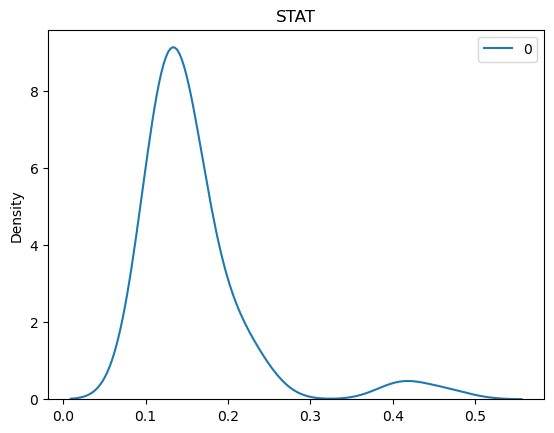

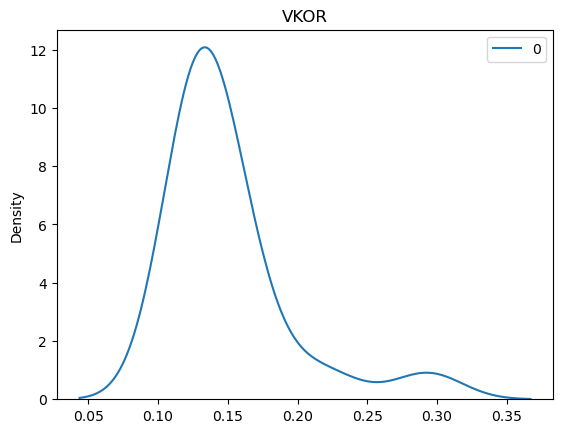

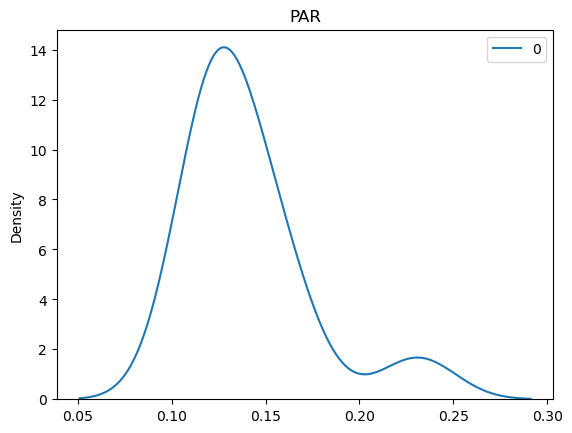

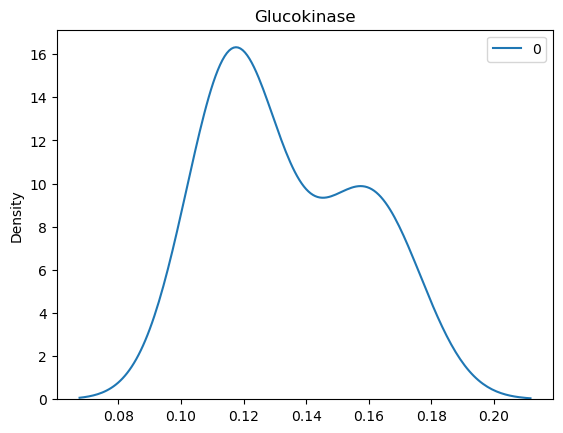

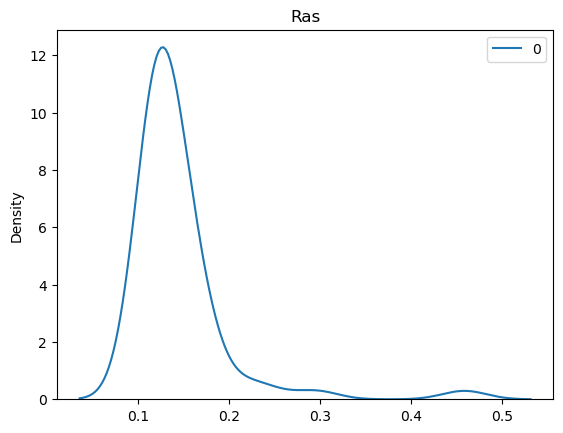

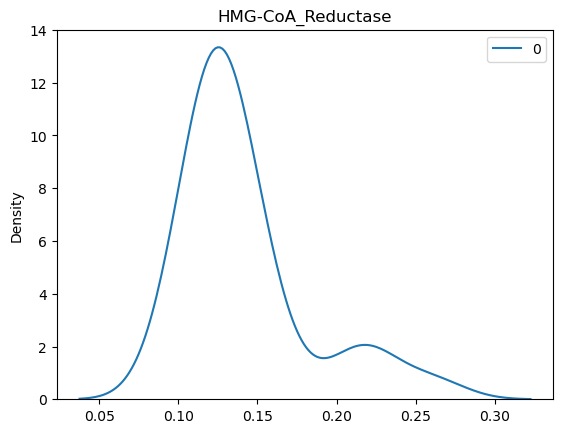

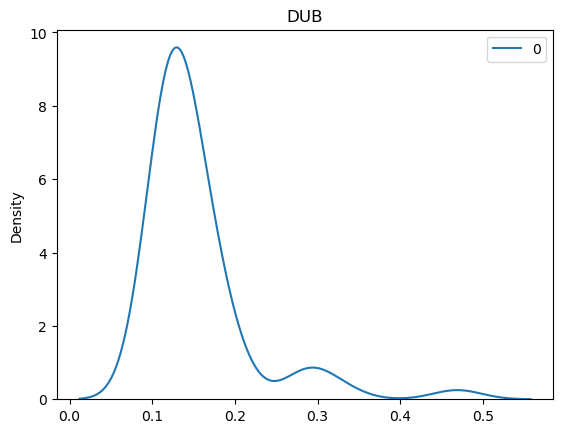

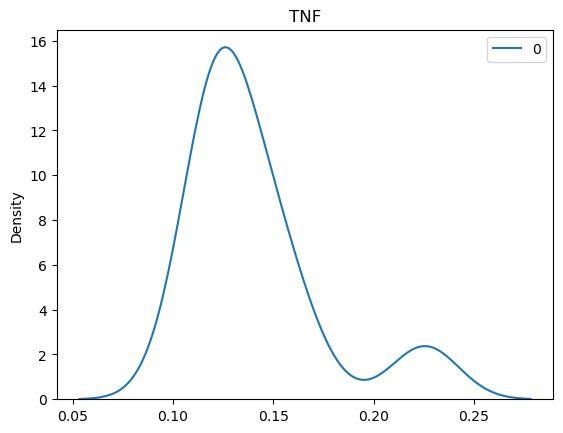

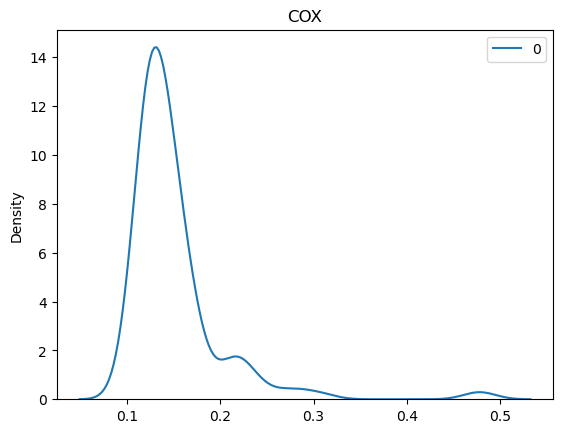

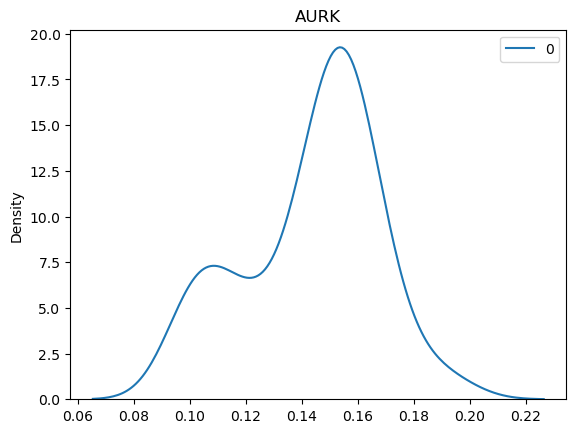

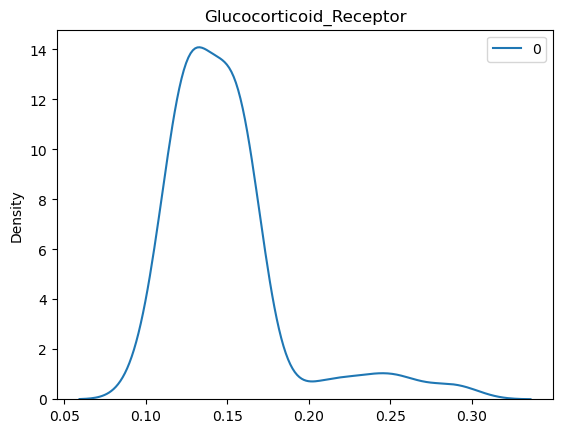

In [78]:
for cl, names in class_dict.items():
    g = sns.kdeplot(refDist.loc[refDist.index.isin(names)])
    plt.title(cl)
    plt.show()
    plt.close()